In [0]:
import pandas as pd

In [0]:
df=pd.read_csv('a1_d2.csv')

In [0]:
if(len(df.columns)==3):
  #Separate class 1 and class 2 points
  class1=df[df.iloc[:,2]==1]
  class2=df[df.iloc[:,2]==0]
  class1=class1.iloc[:,[0,1]]
  class2=class2.iloc[:,[0,1]]
  mean1=class1.mean(axis=0) 
  mean2=class2.mean(axis=0)
  sub1=class1-mean1
  sub2=class2-mean2
if(len(df.columns)==4):
  #Separate class 1 and class 2 points
  class1=df[df.iloc[:,3]==1]
  class2=df[df.iloc[:,3]==0]
  class1=class1.iloc[:,[0,1,2]]
  class2=class2.iloc[:,[0,1,2]]
  mean1=class1.mean(axis=0)
  mean2=class2.mean(axis=0)
  sub1=class1-mean1
  sub2=class2-mean2

In [0]:
import numpy as np
sw=np.dot(sub1.T,sub1) + np.dot(sub2.T,sub2) #Calculate Covariance matrix
sw=np.linalg.inv(sw)
#Find the projection vector direction- (covariance inverse)*(mean1-mean2)
w=np.dot(sw,mean2-mean1)

In [0]:
projection_1=np.dot(w,class1.T)
projection_2=np.dot(w,class2.T)

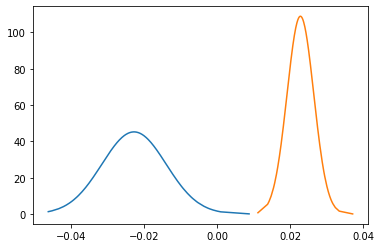

In [26]:
import matplotlib.pyplot as plt
import scipy.stats as stats
projection_1.sort()
projection_2.sort()
pdf1 = stats.norm.pdf(projection_1, np.mean(projection_1), np.std(projection_1)) 
pdf2 = stats.norm.pdf(projection_2, np.mean(projection_2), np.std(projection_2))
plt.plot(projection_1, pdf1)
plt.plot(projection_2, pdf2) 
plt.show()

In [0]:
def solve(m1, m2, std1, std2):
  #Calculate roots of 2 normal distributions
  a = 1/(2*std1**2)-1/(2*std2**2)
  b = m2/(std2**2)-m1/(std1**2)
  c = m1**2/(2*std1**2)-m2**2/(2*std2**2)-np.log(std2/std1)
  return np.roots([a,b,c])

In [0]:
thresholdpoint=solve(np.mean(projection_1),np.mean(projection_2),np.std(projection_1),np.std(projection_2))

In [0]:
import math
if(len(df.columns)==3):
  projection=np.dot(w,df.iloc[:,[0,1]].T)
if(len(df.columns)==4):
  projection=np.dot(w,df.iloc[:,[0,1,2]].T)
array=(projection<thresholdpoint[1]).astype(int)

In [0]:
df['predicted_output']=array

In [0]:
def compute_tp_tn_fn_fp(y_act,y_pred):
  tp=0 # tp: true positive
  fp=0 # fp: false positive
  fn=0 # fn: false negative
  tn=0 # tn: true negative
  size=len(y_act)
  for i in range(size):
    if((y_act[i]==1)&(y_pred[i]==1)):
        tp+=1
    elif((y_act[i]==0)&(y_pred[i]==0)):
        tn+=1
    elif((y_act[i]==0)&(y_pred[i]==1)):
        fp+=1
    elif((y_act[i]==1)&(y_pred[i]==0)):
        fn+=1
  return tp, tn, fp, fn

In [0]:
def compute_accuracy(tp,tn,fn,fp):
  return ((tp+tn)*100)/float(tp+tn+fn+fp)

In [33]:
if(len(df.columns)==4):
  tp, tn, fp, fn = compute_tp_tn_fn_fp( df.iloc[:,2],df.predicted_output)
if(len(df.columns)==5):
  tp, tn, fp, fn = compute_tp_tn_fn_fp( df.iloc[:,3],df.predicted_output)
print(compute_accuracy(tp,tn,fp,fn))

100.0


In [0]:
def compute_precision(tp,fp):
	return (tp*100)/float(tp+fp)

In [0]:
def compute_recall(tp,fn):
	return (tp*100)/float(tp+fn)

In [0]:
def compute_f1_score(y_true, y_pred):
    tp,tn,fp,fn=compute_tp_tn_fn_fp(y_true, y_pred)
    precision=compute_precision(tp,fp)/100
    recall=compute_recall(tp,fn)/100
    f1_score=(2*precision*recall)/(precision + recall)
    return f1_score

In [37]:
if(len(df.columns)==4):
  print(compute_f1_score(df.iloc[:,2],df.predicted_output))
if(len(df.columns)==5):
  print(compute_f1_score(df.iloc[:,3],df.predicted_output))

1.0


In [0]:
import math


In [0]:
if(len(df.columns)==4):
  angle=w[1]/w[0]
  x1=projection_1*math.cos(angle)
  x2=projection_2*math.cos(angle)
  y1=projection_1*math.sin(angle)
  y2=projection_2*math.sin(angle)
  plt.figure(figsize=(10, 7), dpi= 80, facecolor='w', edgecolor='k',linewidth=1.0,
  frameon=None, subplotpars=None, tight_layout=None, constrained_layout=None)
  plt.scatter(x1,y1,c='red',linewidths=0.00001)
  plt.scatter(x2,y2,c='yellow',linewidths=0.00001)
  axes = plt.gca()
  axes.set_xlim([-0.01,0.01])
  axes.set_ylim([-0.05,0.05])
  plt.show()

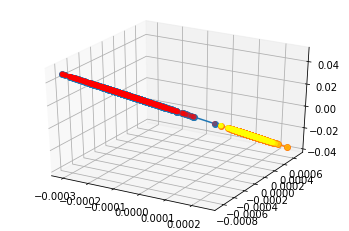

In [40]:
if(len(df.columns)==5):
  cosa=w[0]/math.sqrt(w[0]**2+w[1]**2+w[2]**2)
  cosb=w[1]/math.sqrt(w[0]**2+w[1]**2+w[2]**2)
  cosc=w[2]/math.sqrt(w[0]**2+w[1]**2+w[2]**2)
  x1=projection_1*cosa
  x2=projection_2*cosa
  y1=projection_1*cosb
  y2=projection_2*cosb
  z1=projection_1*cosc
  z2=projection_2*cosc
  import matplotlib.pyplot as plt
  from mpl_toolkits.mplot3d import Axes3D
  fig = plt.figure()
  ax = fig.add_subplot(111, projection='3d')
  ax.scatter(x1, y1, z1, zdir='z', s=20, c='red', depthshade=True)
  ax.scatter(x2, y2, z2, zdir='z', s=20, c='yellow', depthshade=True)
  plt.plot(x1,y1,z1,'-o')
  plt.plot(x2,y2,z2,'-o')
  fig.show()